# Face Recognition using Deep Learning CNN

# Import Important Python libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
img=image.load_img('Train_data_set/MS Dhoni/Screenshot 2023-04-01 211225.png')

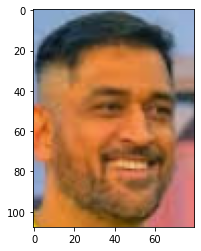

In [3]:
plt.imshow(img)

In [4]:
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset=train.flow_from_directory('Train_data_set/',
                                       target_size=(64,64),
                                       batch_size=64,
                                       class_mode='categorical')

Found 232 images belonging to 7 classes.


In [6]:
test_dataset=train.flow_from_directory('Test_data_set/',
                                       target_size=(64,64),
                                       batch_size=64,
                                       class_mode='categorical')

Found 35 images belonging to 7 classes.


In [7]:
#train_dataset = tf.keras.utils.to_categorical(train_dataset, 3)
#test_dataset = tf.keras.utils.to_categorical(test_dataset, 3)

In [8]:
train_dataset.class_indices

{'Amit Shah': 0,
 'Jasprit Bumrah': 1,
 'MS Dhoni': 2,
 'Narendra Modi': 3,
 'Nitish Kumar': 4,
 'Rohit sharma': 5,
 'Virat Kohli': 6}

In [11]:
TrainClasses=train_dataset.class_indices
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'Amit Shah', 1: 'Jasprit Bumrah', 2: 'MS Dhoni', 3: 'Narendra Modi', 4: 'Nitish Kumar', 5: 'Rohit sharma', 6: 'Virat Kohli'}

 The Number of output neurons:  7


# CNN Model

In [18]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(OutputNeurons, activation='softmax'))

In [19]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [21]:
#history=model.fit(train_dataset,epochs=20,validation_data=test_dataset)
history=model.fit(train_dataset,
                #steps_per_epoch=30,
                epochs=23,
                validation_data=test_dataset,
                 validation_steps=10)

Epoch 1/23
4/4 [==============================] - 4s 679ms/step - loss: 1.9275 - accuracy: 0.2414 - val_loss: 1.8322 - val_accuracy: 0.3429
Epoch 2/23
4/4 [==============================] - 2s 420ms/step - loss: 1.7714 - accuracy: 0.2845
Epoch 3/23
4/4 [==============================] - 2s 404ms/step - loss: 1.4611 - accuracy: 0.4526
Epoch 4/23
4/4 [==============================] - 2s 383ms/step - loss: 1.2432 - accuracy: 0.5474
Epoch 5/23
4/4 [==============================] - 2s 362ms/step - loss: 0.9546 - accuracy: 0.6853
Epoch 6/23
4/4 [==============================] - 2s 369ms/step - loss: 0.7686 - accuracy: 0.7069
Epoch 7/23
4/4 [==============================] - 2s 364ms/step - loss: 0.5914 - accuracy: 0.8017
Epoch 8/23
4/4 [==============================] - 2s 416ms/step - loss: 0.5153 - accuracy: 0.8103
Epoch 9/23
4/4 [==============================] - 2s 393ms/step - loss: 0.3571 - accuracy: 0.9009
Epoch 10/23
4/4 [==============================] - 2s 448ms/step - loss: 0.2

# Pridiction

In [22]:
ImagePath='Train_data_set/MS Dhoni/Screenshot 2023-04-01 211225.png'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image,verbose=0)
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  MS Dhoni


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


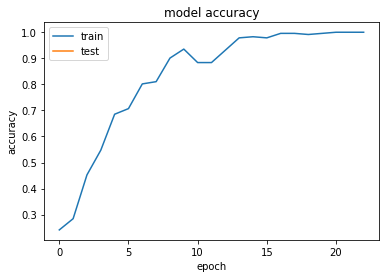

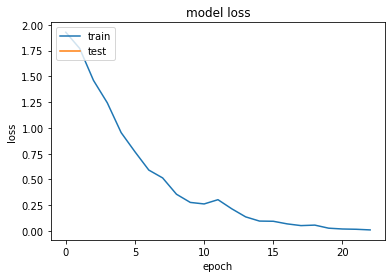

In [23]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
result

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [25]:
train_dataset

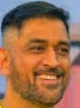

In [26]:
img

In [27]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])